# 실습 1
- beta_0 + (beta_1 * X)
- prediction(beta_0, beta_1, X)
- update_beta(X, y, y_pred, lr)

학습 횟수 : 0
학습 횟수 : 100
학습 횟수 : 200
학습 횟수 : 300
학습 횟수 : 400
학습 횟수 : 500
학습 횟수 : 600
학습 횟수 : 700
학습 횟수 : 800
학습 횟수 : 900
1000번의 학습 이후의 회귀 알고리즘 결과
beta_0: [0.21056] beta_1: [0.75204095]


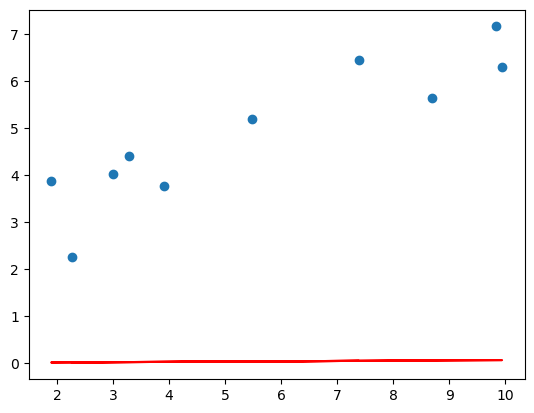

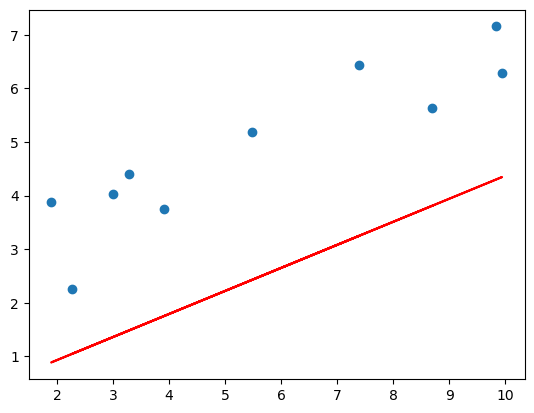

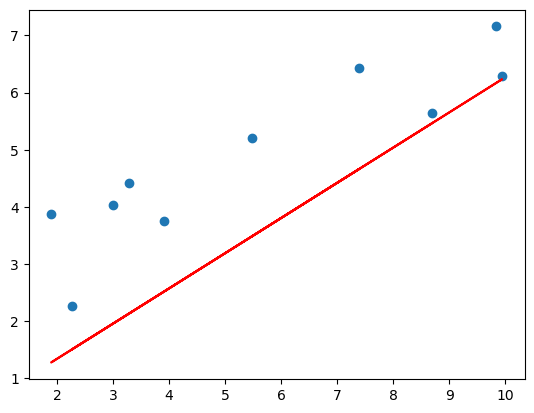

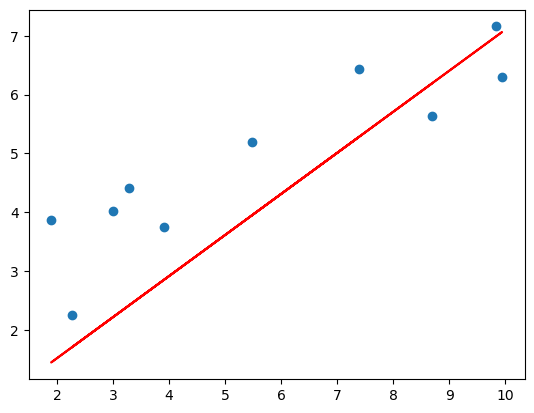

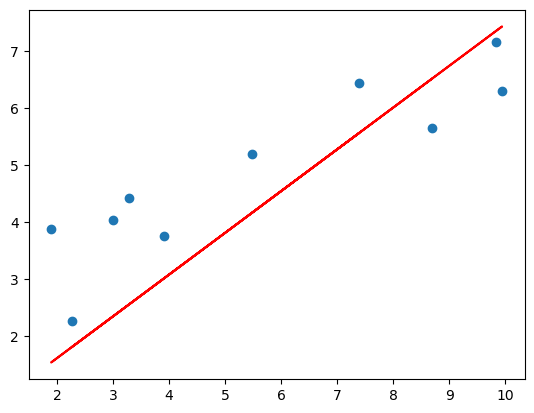

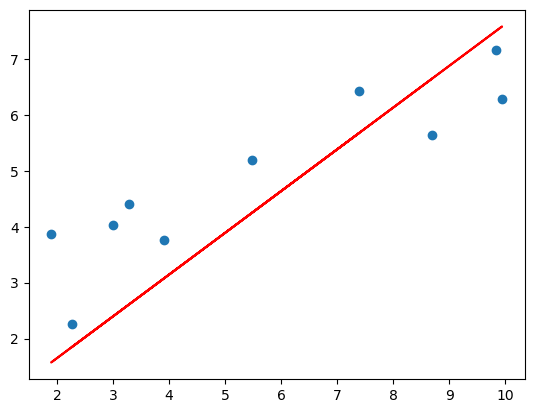

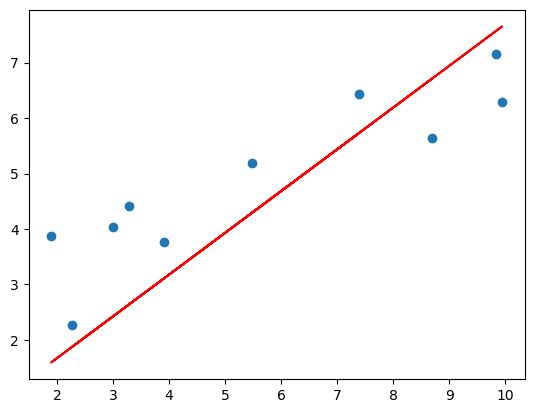

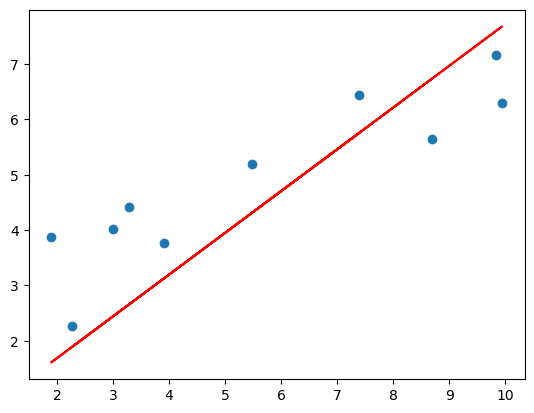

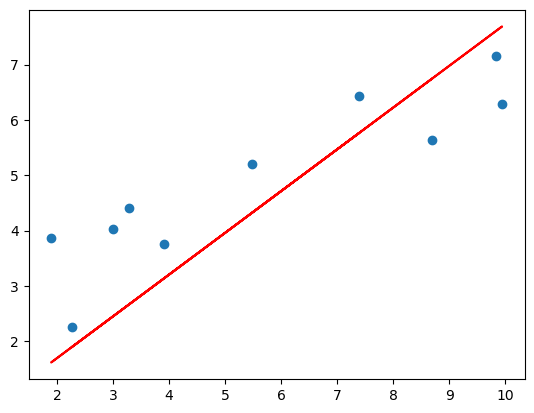

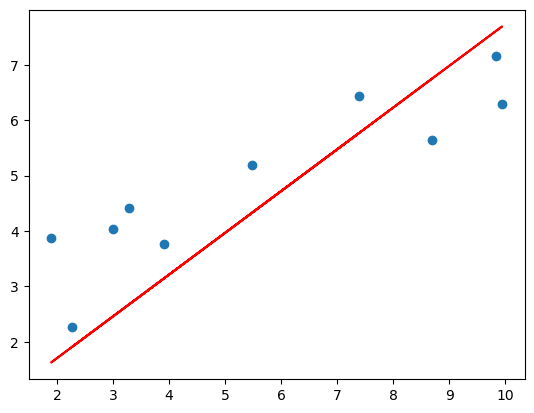

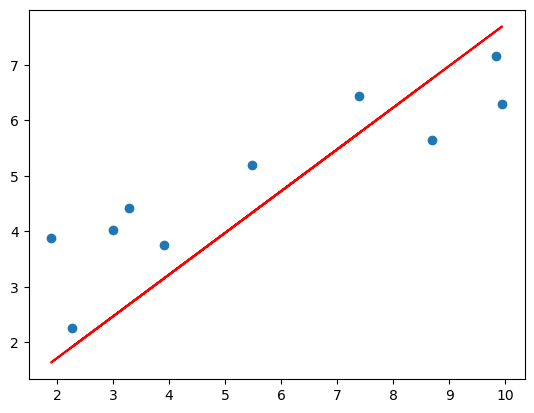

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    
    X = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
    y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])
    
    return X, y

"""
1.  입력값(X)과 beta_0,beta_1를 바탕으로 
    예측값(pre_y)을 계산하여 반환하는 함수를 구현합니다.
    
    회귀 함수 식을 참고하여
    예측값을 계산합니다.
"""
def prediction(beta_0, beta_1, X):
    
    y_pred = None
    
    return y_pred
    

# beta_0와 beta_1 값을 업데이트 하는 규칙을 정의하는 함수입니다.
def update_beta(X, y, y_pred, lr):
    
    delta_0 = -(lr * (2 / len(X)) * np.sum(y - y_pred))
    
    delta_1 = -(lr * (2 / len(X)) * (np.dot(X.T, (y - y_pred))))
    
    return delta_0, delta_1
    

"""
2.  반복 횟수만큼 오차(loss)를 계산하고 
    beta_0,beta_1의 값을 변경하는 함수를 구현합니다.
    
    Step01. 실제 값 y와 prediction 함수를 통해 예측한 
    예측 값 pred_y 간의 차이(loss)를 계산합니다.
    
    loss는 실제값(y) - 예측값(pred_y)으로 정의하겠습니다. 
    
    Step02. 구현된 함수를 이용하여
    beta_0와 beta_1 의 변화값을 각각 beta0_delta, beta1_delta에 저장합니다.
"""
def gradient_descent(X, y, iters, lr):
    
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))
    
    for i in range(iters):
        
        y_pred = None
        loss = np.mean(np.square(y - y_pred))
        
        beta0_delta, beta1_delta = None
        
        beta_0 -= beta0_delta
        beta_1 -= beta1_delta
        
        # 100번의 학습마다 그래프 출력하기
        if i%100==0:
            print("학습 횟수 :",i)
            plotting_graph(X,y,beta_0,beta_1)
        
    return beta_0, beta_1


# 그래프를 시각화하는 함수입니다.
def plotting_graph(X,y,beta_0,beta_1):
    
    y_pred = beta_0 + beta_1[0,0] * X
    
    fig = plt.figure()
    
    plt.scatter(X, y)
    plt.plot(X, y_pred,c='r')


# 회귀 알고리즘 구현 진행을 위한 main() 함수입니다.  
def main():
    
    # 학습을 위해 필요한 파라미터입니다. 
    lr = 1e-4
    iteration = 1000
    
    X, y = load_data()
    
    beta_0, beta_1 = gradient_descent(X, y, iteration, lr)
    
    print("{}번의 학습 이후의 회귀 알고리즘 결과".format(iteration))
    print("beta_0:",beta_0[0], "beta_1:",beta_1[0])
    
    plotting_graph(X,y,beta_0,beta_1)
    
    return beta_0, beta_1

if __name__=="__main__":
    main()

# 실습 2
- train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0) 
- LinearRegression()
- simplelinear.predict(test_X)
- simplelinear.intercept_
- simplelinear.coef_

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 분리하는 모듈을 불러옵니다.
from sklearn.model_selection import train_test_split

# 사이킷런에 구현되어 있는 회귀 모델을 불러옵니다.
from sklearn.linear_model import LinearRegression

"""
1. 데이터를 생성하고, 
   생성한 데이터를 
   학습용 데이터와 테스트용 데이터로 분리하여 
   반환하는 함수를 구현합니다.
   
   학습용 데이터로 전체 데이터의 70%를 사용하고, 
   테스트용 데이터로 나머지 30%를 사용합니다.
   
   동일한 결과 확인을 위하여 random_state를 0으로 설정합니다.
"""
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = None
    
    return train_X, test_X, train_y, test_y

"""
2. 단순 선형회귀 모델을 불러오고, 
   불러온 모델을 학습용 데이터에 
   맞추어 학습시킨 후
   테스트 데이터에 대한 
   예측값을 반환하는 함수를 구현합니다.

   Step01. 사이킷런에 구현되어 있는 
           단순 선형회귀 모델을 불러옵니다.

   Step02. 불러온 모델을 
           학습용 데이터에 맞춰 학습시킵니다.
"""
def regression_model(train_X, train_y):
    
    simplelinear = None
    
    simplelinear.fit(train_X, train_y)
    
    return simplelinear
    
# 그래프를 시각화하는 함수입니다.
def plotting_graph(train_X, test_X, train_y, test_y, predicted):
    fig, ax = plt.subplots(1,2, figsize=(16, 7))
    
    ax[0].scatter(train_X,train_y)
    ax[1].scatter(test_X,test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 
   main() 함수를 완성합니다.
   
   Step01. 학습이 완료된 모델을 활용하여 
           테스트 데이터에 대한 예측을 수행합니다.
        
   Step02. 사이킷런 회귀 모델 내에 구현되어 있는 
           score 함수를 사용하여 
           모델 학습 평가 점수를 model_score 변수에
           저장합니다. 
   
   Step03. 학습된 모델의 beta_0와 beta_1을 
           각각 변수 beta_0와 beta_1에 
           저장합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    simplelinear = regression_model(train_X, train_y)
    
    predicted = None
    
    model_score = None
    
    beta_0 = None
    beta_1 = None
    
    print("> beta_0 : ",beta_0)
    print("> beta_1 : ",beta_1)
    
    print("> 모델 평가 점수 :", model_score)
    
    # 시각화 함수 호출하기
    plotting_graph(train_X, test_X, train_y, test_y, predicted)
    
    return predicted, beta_0, beta_1, model_score
    
    
if __name__=="__main__":
    main()

TypeError: cannot unpack non-iterable NoneType object

# 실습3
- load_boston(return_X_y=True)
- train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
- LinearRegression()
- multilinear.fit(train_X, train_y)
- multilinear.predict(test_X)
- multilinear.score(test_X, test_y)
- multilinear.intercept_
- multilinear.coef_

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# boston 데이터를 위한 모듈을 불러옵니다. 
from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   불러온 데이터를 학습용 데이터와 테스트용 데이터로
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 존재하는 boston 데이터를 
           (X, y)의 형태로 불러옵니다. 
   
   Step02. 불러온 데이터를 
           학습용 데이터와 테스트용 데이터로 분리합니다.
           
           학습용 데이터로 전체 데이터의 80%를 사용하고, 
           테스트용 데이터로 나머지 20%를 사용합니다.
           
           동일한 결과 확인을 위하여 random_state를
           100으로 설정합니다.
"""
def load_data():
    
    X, y  = None
     
    print("데이터의 입력값(X)의 개수 :", X.shape[1])
    
    train_X, test_X, train_y, test_y = None
    
    return train_X, test_X, train_y, test_y
    
"""
2. 다중 선형회귀 모델을 불러오고, 
   불러온 모델을 학습용 데이터에 맞추어 학습시킨 후
   해당 모델을 반환하는 함수를 구현합니다.

   Step01. 사이킷런에 구현되어 있는 
           다중 선형회귀 모델을 불러옵니다.

   Step02. 불러온 모델을 학습용 데이터에 맞춰
           학습시킵니다.
"""
def Multi_Regression(train_X,train_y):
    
    multilinear = None
    
    None
    
    return multilinear
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 main 함수를 완성합니다.
   
   Step01. 학습이 완료된 모델을 활용하여 
           테스트 데이터에 대한 예측을 수행합니다.
        
   Step02. 사이킷런 회귀 모델 내에 구현되어 있는 
           score 함수를 사용하여 
           모델 학습 평가 점수를 model_score 변수에
           저장합니다. 
   
   Step03. 학습된 모델의 beta_0와 beta_i들을 
           각각 변수 beta_0와 beta_i_list에 저장합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    multilinear = Multi_Regression(train_X,train_y)
    
    predicted = None
    
    model_score = None
    
    print("\n> 모델 평가 점수 :", model_score)
     
    beta_0 = None
    beta_i_list = None
    
    print("\n> beta_0 : ",beta_0)
    print("> beta_i_list : ",beta_i_list)
    
    return predicted, beta_0, beta_i_list, model_score
    
if __name__ == "__main__":
    main()

# 실습4
- PolynomialFeatures(degree=2, include_bias=True)
- poly_feat.fit_transform(X)
- LinearRegression()
- multilinear.fit(poly_x, y)
- linear_model.predict(poly_x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 다항 회귀의 입력값을 변환하기 위한 모듈을 불러옵니다.
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    
    np.random.seed(0)
    
    X = 3*np.random.rand(50, 1) + 1
    y = X**2 + X + 2 +5*np.random.rand(50,1)
    
    return X, y
    
"""
1. PolynomialFeature 객체를 활용하여 
   각 변수 값을 제곱하고, 
   데이터에 추가하는 함수를 구현합니다.
   
   Step01. Polynomial 객체를 
           생성합니다.
           
           degree를 2로 설정하고, 
           include_bias 파라미터를 
           True로 설정합니다.
   
   Step02. 변수 값을 제곱하고 
           이를 X에 추가시킨 후 
           poly_X에 저장합니다.
"""
def Polynomial_transform(X):
    
    poly_feat = None
    
    poly_X = None
    
    print("변환 이후 X 데이터\n",poly_X[:3])
    
    return poly_X
    
"""
2. 다중 선형회귀 모델을 불러오고, 
   불러온 모델을 학습용 데이터에 맞추어 
   학습시킨 후 해당 모델을 반환하는 
   함수를 구현합니다.

   Step01. 사이킷런에 구현되어 있는 
           다중 선형회귀 모델을 불러옵니다.

   Step02. 불러온 모델을 제곱값이 추가된 
           데이터에 맞춰 학습시킵니다.
"""
def Multi_Regression(poly_x, y):
    
    multilinear = None
    
    None
    
    return multilinear
    
    
# 그래프를 시각화하는 함수입니다.
def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x, y)
    
    plt.scatter(x, predicted,c='r')
    plt.savefig("test.png")
    elice_utils.send_image("test.png")
    
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 
   main 함수를 완성합니다.
   
   학습이 완료된 모델을 활용하여 
   테스트 데이터에 대한 예측을 수행합니다.
"""
def main():
    
    X,y = load_data()
    
    poly_x = Polynomial_transform(X)
    
    linear_model = Multi_Regression(poly_x,y)
    
    predicted = None
    
    plotting_graph(X,y,predicted)
    
    return predicted
    
if __name__=="__main__":
    main()

# 실습 5
- load_boston(return_X_y=True)
- train_test_split(X, y, test_size=0.2, random_state=100)
- KFold(n_splits=5)
- kfold.split(train_X)
- train_X[train_idx], train_X[val_idx]
- train_y[train_idx], train_y[val_idx]
- model.fit(X_train, y_train)
- model.score(X_val, y_val)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# sklearn의 KFold 모듈 불러오기
from sklearn.model_selection import KFold

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   불러온 데이터를 학습용 데이터와 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 존재하는 boston 데이터를 
           (X, y)의 형태로 불러옵니다. 
   
   Step02. 불러온 데이터를 
           학습용 데이터와 테스트용 데이터로
           분리합니다.
           
           학습용 데이터로 전체 데이터의 80%를,
           테스트용 데이터로 나머지 20%를 사용합니다.
           
           동일한 결과 확인을 위하여 random_state를
           100으로 설정합니다.
"""
def load_data():
    
    X, y = None
    
    train_X, test_X, train_y, test_y = None
    
    return train_X, test_X, train_y, test_y
    

"""
2. K-fold 교차 검증을 통한 
   모델 학습 및 예측 수행을 진행할 함수를 구현합니다.
   
   Step01. 전체 데이터를 5개로 분리할 수 있도록 
           KFold 객체를 정의합니다.
           
   Step02. 정의한 kFold 객체와 .split() 함수를 이용하여 
           학습용 데이터 내에서 다시 
           학습용(Train) 데이터와 검증용(Validation)
           데이터를 나누고 
           각각 X_train, X_val, y_train, y_val에
           저장합니다.
           
           train_idx 와 val_idx는 분리된 데이터들의
           인덱스입니다.
            
   Step03. 분리한 학습용 데이터로 모델을 학습시키고,
           검증용 데이터로 모델을 평가하여 
           각 데이터에 대한 모델 평가 점수를 score
           변수에 저장합니다.
"""
def kfold_regression(train_X, train_y):
    
    # 반복문 내에서 횟수를 표시하기 위한 변수 설정하기
    n_iter = 0
    
    # 각 fold 마다 모델 검증 점수를 저장하기 위한 빈 리스트 생성하기
    model_scores = []
    
    kfold = None
    
    for train_idx, val_idx in None:
        
        X_train, X_val = None
        y_train, y_val = None
        
        # 동일한 가중치 사용을 위해 각 fold 마다 모델 초기화 하기
        model = LinearRegression()
        
        None
        
        # 각 Iter 별 모델 평가 점수 측정
        score = None
        
        # 학습용 데이터의 크기를 저장합니다.
        train_size = X_train.shape[0]
        val_size = X_val.shape[0]
    
        print("Iter : {0} Cross-Validation Accuracy : {1}, Train Data 크기 : {2}, Validation Data 크기 : {3}"
              .format(n_iter, score, train_size, val_size))
    
        n_iter += 1
        
        # 전체 모델 점수를 저장하는 리스트에 추가하기
        model_scores.append(score)
        
    return kfold, model, model_scores
        
        
def main():
    
    # 학습용 데이터와 테스트 데이터 불러오기
    train_X, test_X, train_y, test_y = load_data()
    
    # KFold 교차 검증을 통한 학습 결과와 회귀 모델을 반환하는 함수 호출하기
    kfold, model, model_scores = kfold_regression(train_X, train_y)
    
    # 전체 성능 점수의 평균 점수 출력
    print("\n> 평균 검증 모델 점수 : ", np.mean(model_scores))
    

    
if __name__ == "__main__":
    main()


# 실습 6
- load_boston().feature_names
- Ridge(alpha=10)
- ridge_reg.fit(X,y)
- Lasso(alpha=10)
- lasso_reg.fit(X, y)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from elice_utils import EliceUtils
elice_utils = EliceUtils()

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   불러온 데이터를 학습용 데이터와 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 존재하는 boston 데이터를 
           (X, y)의 형태로 불러옵니다. 
   
   Step02. 데이터의 변수 이름을 feature_names 에
           저장합니다.
"""
def load_data():
    
    X, y = load_boston(return_X_y = True)
    
    feature_names = None
    
    return X,y,feature_names
    
"""
2. 릿지(Ridge) 회귀를 구현하고, 
   전체 데이터를 바탕으로 학습시킨 모델을 
   반환하는 함수를 완성합니다.
   
   Step01. 사이킷런에 구현되어 있는 
           릿지(Ridge) 회귀 모델을 불러옵니다.
           
           파라미터 alpha를 10으로 설정합니다.
   
   Step02. 불러온 모델을 전체 데이터에 맞춰
           학습시킵니다.
"""
def Ridge_regression(X, y):
    
    ridge_reg = None
    
    None
    
    return ridge_reg

"""
3. 라쏘(Lasso) 회귀를 구현하고, 
   전체 데이터를 바탕으로 학습시킨 모델을 
   반환하는 함수를 완성합니다.
   
   Step01. 사이킷런에 구현되어 있는 
           라쏘(Lasso) 회귀 모델을 불러옵니다.
           
           파라미터 alpha를 10으로 설정합니다.
   
   Step02. 불러온 모델을 전체 데이터에 맞춰
           학습시킵니다.
"""
def Lasso_regression(X, y):
    
    lasso_reg = None
    
    None
    
    return lasso_reg
    
# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef, title):
    fig = plt.figure()
    
    plt.ylim(-1,1)
    plt.title(title)
    coef.plot(kind='bar')

    plt.savefig("result.png")
    elice_utils.send_image("result.png")


def main():
    
    X,y,feature_names = load_data()
    
    ridge_reg = Ridge_regression(X, y)
    lasso_reg = Lasso_regression(X, y)
    
    ## Ridge 회귀의 beta_i의 크기를 저장합니다.
    ridge_coef = pd.Series(ridge_reg.coef_, feature_names).sort_values()
    print("Ridge 회귀의 beta_i\n", ridge_coef)
    
    ## Lasso 회귀의 beta_i의 크기를 저장합니다.
    lasso_coef = pd.Series(lasso_reg.coef_, feature_names).sort_values()
    print("Lasso 회귀의 beta_i\n", lasso_coef)
    
    plot_graph(ridge_coef, 'Ridge')
    plot_graph(lasso_coef, 'Lasso')

if __name__=="__main__":
    main()

# 실습7
- load_boston(return_X_y=True)
- load_boston().feature_names
- ElasticNet()
- ElasticNet_reg.fit(train_X, train_y)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from elice_utils import EliceUtils
elice_utils = EliceUtils()

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   데이터와 변수 이름을 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 존재하는 boston 데이터를 
           (X, y)의 형태로 불러옵니다. 
   
   Step02. 데이터의 변수 이름을 feature_names 에 저장합니다.
   
   [실습6]에서 구현한 함수를 그대로 이용할 수 있습니다.
"""
def load_data():
    
    X, y = None
    
    feature_names = None
    
    return X,y,feature_names
    
"""
2. 엘라스틱 넷(ElasticNet) 회귀를 구현하고, 
   학습용 데이터를 바탕으로 학습시킨 모델을 
   반환하는 함수를 완성합니다.
   
   Step01. 사이킷런에 구현되어 있는 
           엘라스틱 넷(ElasticNet) 회귀 모델을 불러옵니다.
           
           파라미터 alpha와 l1_ratio를 자유롭게 설정합니다.
   
   Step02. 불러온 모델을 학습용 데이터에 맞춰 학습시킵니다.
"""

def ElasticNet_regression(train_X, train_y):
    
    ElasticNet_reg = None
    
    None
    
    return ElasticNet_reg
    
    
# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef):
    coef.plot(kind='bar')
    
    plt.savefig("result.png")
    elice_utils.send_image("result.png")
    
    
def main():
    
    X,y,feature_names = load_data()
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2, random_state=100)
    
    elasticnet_reg = ElasticNet_regression(train_X, train_y)
    
    # 엘라스틱넷 회귀 모델 평가 점수 출력하기
    score = elasticnet_reg.score(test_X,test_y)
    print("ElasticNet 회귀의 평가 점수:", score)
    
    # 엘라스틱넷 회귀의 beta_i의 크기를 저장합니다.
    ElasticNet_coef = pd.Series(elasticnet_reg.coef_, feature_names).sort_values()
    print("\nElasticNet 회귀의 beta_i\n", ElasticNet_coef)
    
    plot_graph(ElasticNet_coef)
    
    return elasticnet_reg

if __name__=="__main__":
    main()

# 실습8
- RSS += (test_y[i] - predicted[i]) ** 2
- load_data()
- Linear_Regression(train_X, train_y)
- lr.predict(test_X)
- return_RSS(test_y, predicted)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from elice_utils import EliceUtils
elice_utils = EliceUtils()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 X와 y를 생성하고, 학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
     
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

# 회귀 모델을 불러오고, 불러온 모델을 학습용 데이터에 맞춰 학습시켜 반환하는 함수입니다.
def Linear_Regression(train_X, train_y):
    
    lr = LinearRegression()
    
    lr.fit(train_X,train_y)
    
    return lr
    
"""
1. RSS(Residual Sum of Squares)를 계산하여
   반환하는 함수를 완성합니다.
"""
def return_RSS(test_y, predicted):
    
    RSS = 0
    for i in range(len(test_y)):
        None
        
    return RSS
    
    
# 그래프로 시각화합니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    
    plt.savefig("result.png")
    elice_utils.send_image("result.png")

"""
3. 정의한 함수들을 이용하여 main() 함수를 완성합니다.
   
   Step01. 생성한 데이터를 
           학습용 데이터와 테스트 데이터로
           분리하여 반환하는 함수를 호출합니다.
           
   Step02. 학습용 데이터를 바탕으로 학습한 선형 회귀 
           모델을 반환하는 함수를 호출합니다.
          
   Step03. 학습된 모델을 바탕으로 계산된 
           테스트 데이터의 예측값을 predicted에
           저장합니다.
           
   Step04. 회귀 알고리즘을 평가하기 위한 RSS 값을 RSS에
           저장합니다.
"""
def main():
    
    train_X, train_y, test_X, test_y = None
     
    lr = None
    
    predicted = None
    
    RSS = None
    print("> RSS :",RSS)
    
    plotting_graph(test_X, test_y, predicted)

if __name__=="__main__":
    main()

# 실습9
- load_data()
- Linear_Regression(train_X, train_y)
- lr.predict(test_X)
- mean_absolute_error(test_y, predicted)
- mean_squared_error(test_y, predicted)

In [ ]:
from elice_utils import EliceUtils
elice_utils = EliceUtils()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 데이터 X와 y를 생성하고, 학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

# 회귀 모델을 불러오고, 불러온 모델을 학습용 데이터에 맞춰 학습시켜 반환하는 함수입니다.
def Linear_Regression(train_X, train_y):
    
    lr = LinearRegression()
    
    lr.fit(train_X,train_y)
    
    return lr
    
# 그래프로 시각화합니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    
    plt.savefig("result.png")
    elice_utils.send_image("result.png")

"""
1. 정의한 함수들을 이용하여 main() 함수를 완성합니다.
   
   Step01. 생성한 데이터를 
           학습용 데이터와 테스트 데이터로 
           분리하여 반환하는 함수를 호출합니다.
           
   Step02. 학습용 데이터를 바탕으로 학습한 선형 회귀
           모델을 반환하는 함수를 호출합니다.
          
   Step03. 학습된 모델을 바탕으로 계산된 
           테스트 데이터의 예측값을 predicted에
           저장합니다.
           
   Step04. 회귀 알고리즘을 평가하기 위한 MSE, MAE 값을 
           각각 MSE,MAE 에 저장합니다.
"""
def main():
    
    train_X, train_y, test_X, test_y = None
    
    lr = None
    
    predicted = None
    
    MAE = None
    MSE = None
    
    print("> MSE :",MSE)
    print("> MAE :",MAE)
    
    plotting_graph(test_X, test_y, predicted)
    
    return MSE, MAE

if __name__=="__main__":
    main()

# 실습10
- load_data()
- Linear_Regression(train_X, train_y)
- lr.predict(test_X)
- r2_score(test_y, predicted)

In [ ]:
from elice_utils import EliceUtils
elice_utils = EliceUtils()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# 데이터 X와 y를 생성하고, 학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

# 회귀 모델을 불러오고, 불러온 모델을 학습용 데이터에 맞춰 학습시켜 반환하는 함수입니다.
def Linear_Regression(train_X, train_y):
    
    lr = LinearRegression()
    
    lr.fit(train_X,train_y)
    
    return lr
    
# 그래프로 시각화합니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    
    plt.savefig("result.png")
    elice_utils.send_image("result.png")

"""
1. 정의한 함수들을 이용하여 main() 함수를 완성합니다.
   
   Step01. 생성한 데이터를 
           학습용 데이터와 테스트 데이터로 
           분리하여 반환하는 함수를 호출합니다.
           
   Step02. 학습용 데이터를 바탕으로 학습한 선형 회귀
           모델을 반환하는 함수를 호출합니다.
          
   Step03. 학습된 모델을 바탕으로 계산된
           테스트 데이터의 예측값을 predicted에
           저장합니다.
           
   Step04. 회귀 알고리즘을 평가하기 위한 r2_score값을 
           R_squared에 저장합니다.
"""
def main():
    
    train_X, train_y, test_X, test_y = None
    
    lr = None
    
    predicted = None
    
    R_squared  = None
    
    print("> R_squared :",R_squared)
    
    plotting_graph(test_X, test_y, predicted)
    
    return R_squared

if __name__=="__main__":
    main()

# 실습 11

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


"""
    1. 학습을 위한 준비가 완료된 데이터를 반환하는
       load_data() 함수를 구현합니다.
       
       Step01. 당뇨병 관련 데이터셋을 (X, y)의 형태로 불러옵니다. 
              
       Step02. 모델 학습을 위해 데이터를 
               학습용(80%)/테스트용(20%)로 분리합니다.
               (random_state = 100)
"""

def load_data():
    X, y = load_diabetes(return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)
    
    return train_X, test_X, train_y, test_y
    
    
"""
    2. 회귀 모델을 불러오고,
       테스트 데이터에 대한 예측 결과를 반환하는
       reg_model() 함수를 구현합니다.
"""
def reg_model(train_X, test_X, train_y):
    model = LinearRegression()
    fitted_model = model.fit(train_X, train_y)
    
    print(fitted_model.summary())
    
    pred = model.predict(test_X)
    
    return pred
    

"""
    3. 구현한 회귀 모델의 r_square 값을
       반환하는 r_square() 함수를 구현합니다.

"""
def r_square(pred, test_y):
    r2 = r2_score(test_y, pred)
    
    return r2
    
    
"""
    4. 구현한 함수들을 활용하여 
       당뇨병 데이터에 대한 회귀를 진행하는 
       main() 함수를 구현합니다.
"""
def main():
    train_X, test_X, train_y, test_y = load_data()
    
    pred = reg_model(train_X, test_X, train_y)
    
    r2 = r_square(pred, test_y)
    
    print("r2 score : ",r2)
    
    
if __name__ == "__main__":
    main()

AttributeError: 'LinearRegression' object has no attribute 'summary'